In [51]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

#model_path = "C:\\Users\\subin\\.cache\\huggingface\\hub\\models--SamLowe--roberta-base-go_emotions\\snapshots\\roberta-goemo"
model_path = "C:\\Users\\subin\\.cache\\huggingface\\hub\\models--roberta-base\\snapshots\\roberta-base"

In [52]:
import torch

tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path)

def get_embedding(text):
    inputs = tokenizer(text, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs, output_hidden_states=True)
        last_hidden_state = outputs.hidden_states[-1]

        # Mean pooling
        attention_mask = inputs['attention_mask']
        mask_expanded = attention_mask.unsqueeze(-1).expand(last_hidden_state.size()).float()
        sum_embeddings = torch.sum(last_hidden_state * mask_expanded, 1)
        sum_mask = torch.clamp(mask_expanded.sum(1), min=1e-9)
        sentence_embedding = sum_embeddings / sum_mask

    return sentence_embedding

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at C:\Users\subin\.cache\huggingface\hub\models--roberta-base\snapshots\roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [6]:
pride = "satisfied with one's achievement or high standards"
joy = "feeling great happiness and overwhelming delight"
admiration = "respect and high regard for something excellent or skilled"
amusement = "finding something funny, lighthearted and entertaining"
anger = "strong feeling of displeasure and hostility or tension"
annoyance = "mild irritation or impatience for disturbance or distraction"

approval = "favorable opinion, agreement with something"
caring = "showing concern, kindness for others well-being"
confusion = "lacking understanding, unsure or uncertain"
curiosity = "strong feeling to know or learn something"
desire = "strong feeling of wanting or wishing for something"
disappointment = "displeasure due to unfulfilled expectations"
disapproval = "unfavorable opinion or negative judgment"
disgust = "feeling of revulsion or strong sickness due to some offensive"
embarrassment = "awkward feeling, or shame in public"

excitement = "intense enthusiasm, thrilled, energetic"
fear = "acute alarm caused by perceived danger or threat"
gratitude = "thankfulness and appreciation for kindness"
grief = "deep sorrow, emotional pain caused by loss or death"
love = "deep affection or attraction, profound connection"
nervousness = "feeling uneasy, worried or apprehensive about something"
optimism = "hopefulness and confidence about something in future"
realization = "suddenly achieving clear understanding, awareness"
relief = "feeling of release from anxiety, pain or distress"
remorse = "deep regret or guilt for committed wrong doing"
sadness = "unhappy, sorrowful and lacking cheerfulness"
surprise = "an unexpected, startled feeling from something sudden"
neutral = "absence of strong emotion, neither positive or negative"

In [ ]:
joy_embed = get_embedding(joy)
admiration_embed = get_embedding(admiration)
amusement_embed = get_embedding(amusement)
anger_embed = get_embedding(anger)
annoyance_embed = get_embedding(annoyance)
approval_embed = get_embedding(approval)
caring_embed = get_embedding(caring)
confusion_embed = get_embedding(confusion)
curiosity_embed = get_embedding(curiosity)
desire_embed = get_embedding(desire)
disappointment_embed = get_embedding(disappointment)
disapproval_embed = get_embedding(disapproval)
disgust_embed = get_embedding(disgust)
embarrassment_embed = get_embedding(embarrassment)
excitement_embed = get_embedding(excitement)
fear_embed = get_embedding(fear)
gratitude_embed = get_embedding(gratitude)
grief_embed = get_embedding(grief)
love_embed = get_embedding(love)
nervousness_embed = get_embedding(nervousness)
optimism_embed = get_embedding(optimism)
realization_embed = get_embedding(realization)
relief_embed = get_embedding(relief)
remorse_embed = get_embedding(remorse)
sadness_embed = get_embedding(sadness)
surprise_embed = get_embedding(surprise)
neutral_embed =  get_embedding(neutral)
pride_embed = get_embedding(pride)

In [ ]:
from torch.nn.functional import cosine_similarity
cosine_similarity(pride_embed, joy_embed).item()

0.26735782623291016

In [17]:
e1 = get_embedding("pride")
e2 = get_embedding("joy")
cosine_similarity(e1, e2).item()

0.5900887846946716

In [22]:
label_embeddings = {
    "pride": pride_embed.tolist(),
    "joy": joy_embed.tolist(),
    "admiration": admiration_embed.tolist(),
    "amusement": amusement_embed.tolist(),
    "anger": anger_embed.tolist(),
    "annoyance": annoyance_embed.tolist(),
    "approval": approval_embed.tolist(),
    "caring": caring_embed.tolist(),
    "confusion": confusion_embed.tolist(),
    "curiosity": curiosity_embed.tolist(),
    "desire": desire_embed.tolist(),
    "disappointment": disappointment_embed.tolist(),
    "disapproval": disapproval_embed.tolist(),
    "disgust": disgust_embed.tolist(),
    "embarrassment": embarrassment_embed.tolist(),
    "excitement": excitement_embed.tolist(),
    "fear": fear_embed.tolist(),
    "gratitude": gratitude_embed.tolist(),
    "grief": grief_embed.tolist(),
    "love": love_embed.tolist(),
    "nervousness": nervousness_embed.tolist(),
    "optimism": optimism_embed.tolist(),
    "realization": realization_embed.tolist(),
    "relief": relief_embed.tolist(),
    "remorse": remorse_embed.tolist(),
    "sadness": sadness_embed.tolist(),
    "surprise": surprise_embed.tolist(),
    "neutral": neutral_embed.tolist()
}

In [23]:
import json

with open("label_embeddings.json", "w") as f:
    json.dump(label_embeddings, f)

In [1]:
import json

with open("label_embeddings.json", "r") as f:
    label_embeddings = json.load(f)

In [5]:
emo_embed = {}
for k, v in label_embeddings.items():
    emo_embed[str(k)] = torch.tensor(v, dtype=torch.float32)

In [72]:
text = "I am fed up with your behavior"
text_embeds = get_embedding(text)

e1 = emo_embed.get("angry", 0)
w1 = 0.8
e2 = emo_embed.get("disappointment", 0)
w2 = 0.5

emotion_embeds = (w1 * e1 + w2 * e2) / (w1 + w2)

In [70]:
emotion_embeds.shape

torch.Size([1, 768])

In [69]:
from torch.nn.functional import cosine_similarity
cosine_similarity(text_embeds, emotion_embeds).item()

0.06347507238388062

In [71]:
import torch.nn.functional as F

#text_embeds = F.normalize(text_embeds, dim=0)
emotion_embeds = F.normalize(emotion_embeds, dim=0)
cosine_similarity(text_embeds, emotion_embeds).item()

0.07140300422906876

In [38]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

vectors = torch.stack([emo_embed[e] for e in emo_embed.keys()] + [text_embeds])
labels = list(emo_embed.keys()) + ["text"]

proj = PCA(n_components=2).fit_transform(vectors.numpy())

plt.figure(figsize=(6,6))
plt.scatter(proj[:-1,0], proj[:-1,1], label="Emotions")
plt.scatter(proj[-1,0], proj[-1,1], color='red', label="Text")
for i, name in enumerate(labels):
    plt.text(proj[i,0]+0.01, proj[i,1]+0.01, name)
plt.legend()
plt.title("PCA Projection of Text vs Emotion Embeddings")
plt.show()

ValueError: Found array with dim 3, while dim <= 2 is required by PCA.

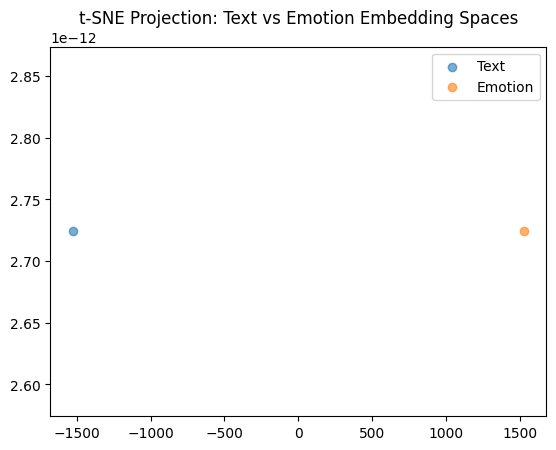

In [19]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

combined = np.concatenate([text_embeds, emotion_embeds])
labels = np.array(["text"] * len(text_embeds) + ["emotion"] * len(emotion_embeds))

tsne = TSNE(n_components=2, perplexity=1, random_state=42)
proj = tsne.fit_transform(combined)

plt.scatter(proj[labels=="text",0], proj[labels=="text",1], alpha=0.6, label="Text")
plt.scatter(proj[labels=="emotion",0], proj[labels=="emotion",1], alpha=0.6, label="Emotion")
plt.legend()
plt.title("t-SNE Projection: Text vs Emotion Embedding Spaces")
plt.show()


In [20]:
from sklearn.cross_decomposition import CCA

cca = CCA(n_components=min(text_embeds.shape[1], emotion_embeds.shape[1]))
cca.fit(text_embeds, emotion_embeds)
corrs = np.corrcoef(cca.x_scores_.T, cca.y_scores_.T).diagonal()
print(f"Average canonical correlation: {np.mean(corrs):.4f}")

ValueError: Found array with 1 sample(s) (shape=(1, 768)) while a minimum of 2 is required by CCA.